In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

d = pd.read_csv("train.csv")

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns = 'Outlet_Type', aggfunc = lambda x : x.mode()[0])
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

encoder = LabelEncoder()
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

X = data.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

metrics.r2_score(y_test, y_pred)

0.5165527878383627

In [31]:
# Calculate R-squared score
r2_score = metrics.r2_score(y_test, y_pred)

# Convert R-squared score to percentage
r2_percentage = r2_score * 100

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the overall accuracy as 1 - (MAE / range of actual values)
range_actual = np.max(y_test) - np.min(y_test)
overall_accuracy = (1 - (mae / range_actual)) * 100

print(f'R-squared Score: {r2_score:.4f}')
print(f'R-squared Percentage: {r2_percentage:.2f}%')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Overall Accuracy: {overall_accuracy:.2f}%')

R-squared Score: 0.5166
R-squared Percentage: 51.66%
Mean Absolute Error (MAE): 817.8385
Overall Accuracy: 93.73%


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

data = pd.read_csv("train.csv")

data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'}}, inplace=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor  # Changed to RandomForestRegressor
from sklearn import metrics

encoder = LabelEncoder()
data['Item_Identifier']  = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content']  = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type']  = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier']  = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size']  = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']  = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type']  = encoder.fit_transform(data['Outlet_Type'])

X = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()  # Changed to RandomForestRegressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_score = metrics.r2_score(y_test, y_pred)
print(f"R^2 Score: {r2_score}")

R^2 Score: 0.5638532427304793


In [33]:
# Calculate R-squared score
r2_score = metrics.r2_score(y_test, y_pred)

# Convert R-squared score to percentage
r2_percentage = r2_score * 100

# Calculate Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Calculate the overall accuracy as 1 - (MAE / range of actual values)
range_actual = np.max(y_test) - np.min(y_test)
overall_accuracy = (1 - (mae / range_actual)) * 100

print(f'R-squared Score: {r2_score:.4f}')
print(f'R-squared Percentage: {r2_percentage:.2f}%')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Overall Accuracy: {overall_accuracy:.2f}%')

R-squared Score: 0.5639
R-squared Percentage: 56.39%
Mean Absolute Error (MAE): 782.9426
Overall Accuracy: 94.00%


           Model  R^2 Score
0        XGBoost   0.516553
1  Random Forest   0.556566
Accuracy Difference: 0.0400


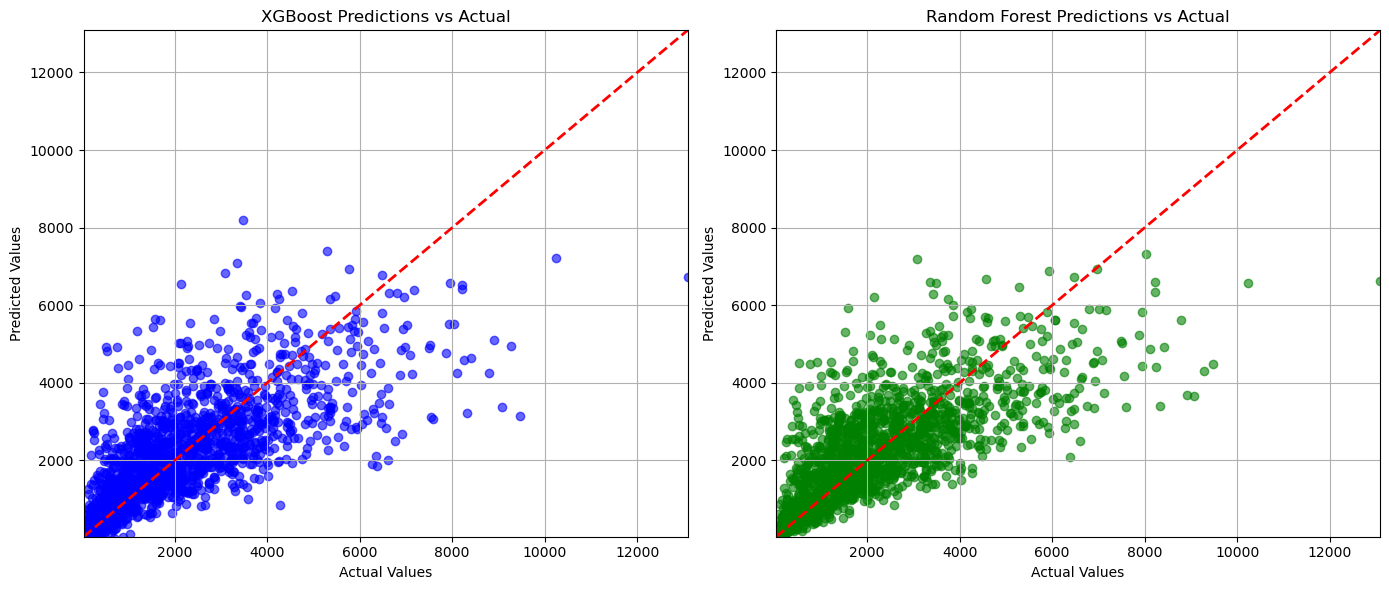

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv("train.csv")

# Data preprocessing
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)
mode_of_outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode()[0])
missing_value = data['Outlet_Size'].isnull()
data.loc[missing_value, 'Outlet_Size'] = data.loc[missing_value, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

# Label encoding
encoder = LabelEncoder()
data['Item_Identifier'] = encoder.fit_transform(data['Item_Identifier'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Outlet_Identifier'] = encoder.fit_transform(data['Outlet_Identifier'])
data['Outlet_Size'] = encoder.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type'] = encoder.fit_transform(data['Outlet_Location_Type'])
data['Outlet_Type'] = encoder.fit_transform(data['Outlet_Type'])

# Prepare features and target variable
X = data.drop(columns='Item_Outlet_Sales', axis=1)
y = data['Item_Outlet_Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_r2_score = metrics.r2_score(y_test, y_pred_xgb)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2_score = metrics.r2_score(y_test, y_pred_rf)

# Create a DataFrame to compare the models
comparison_df = pd.DataFrame({
    'Model': ['XGBoost', 'Random Forest'],
    'R^2 Score': [xgb_r2_score, rf_r2_score]
})

# Calculate accuracy difference
accuracy_difference = abs(xgb_r2_score - rf_r2_score)

# Print the results
print(comparison_df)
print(f"Accuracy Difference: {accuracy_difference:.4f}")

# Plotting the comparison
# Scatter plot for XGBoost predictions
plt.figure(figsize=(14, 6))

# Scatter plot for XGBoost
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line for reference
plt.title('XGBoost Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()

# Scatter plot for Random Forest
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Diagonal line for reference
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y.min(), y.max()])
plt.ylim([y.min(), y.max()])
plt.grid()

plt.tight_layout()
plt.show()